In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

In [3]:
!pip install js

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


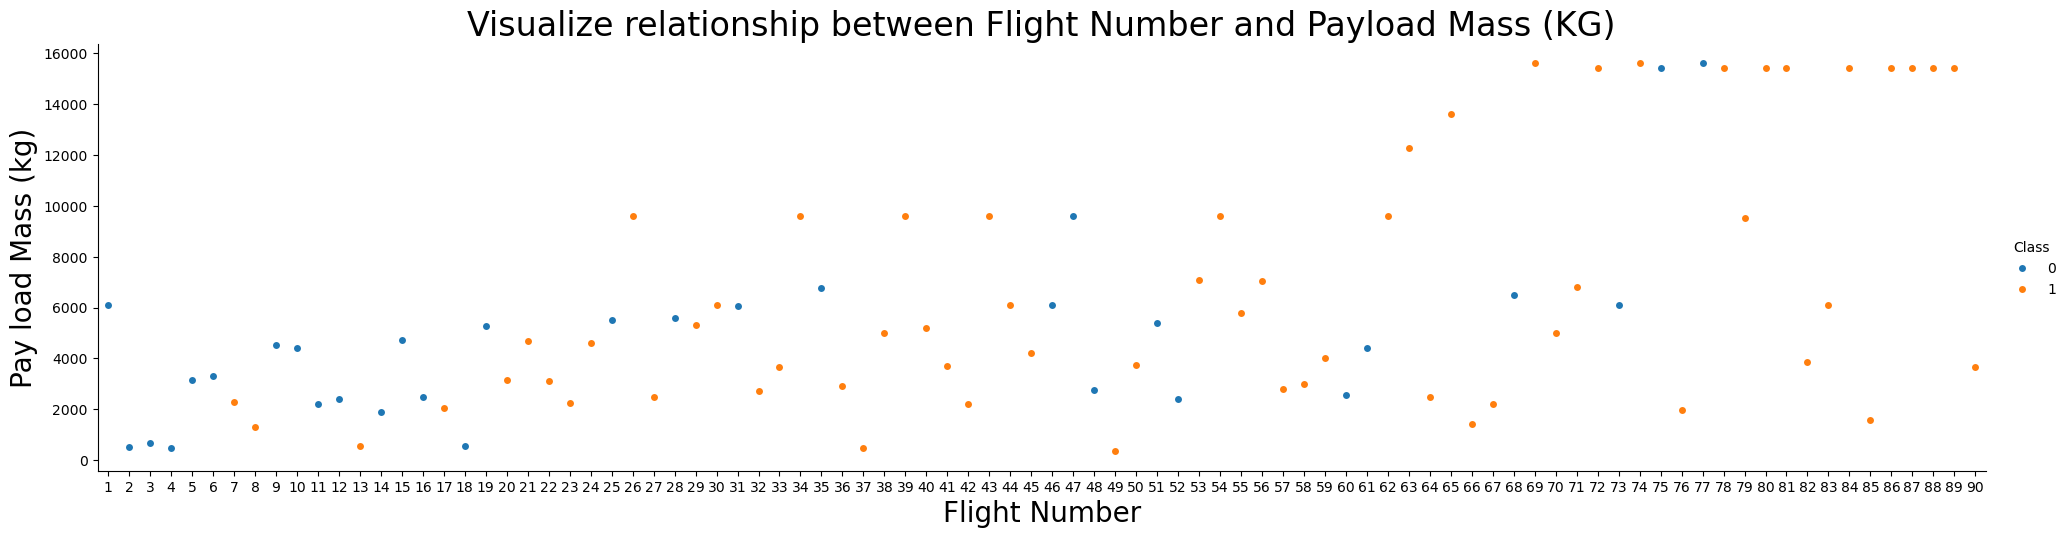

In [13]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.title("Visualize relationship between Flight Number and Payload Mass (KG)", fontsize = 24)
plt.show()

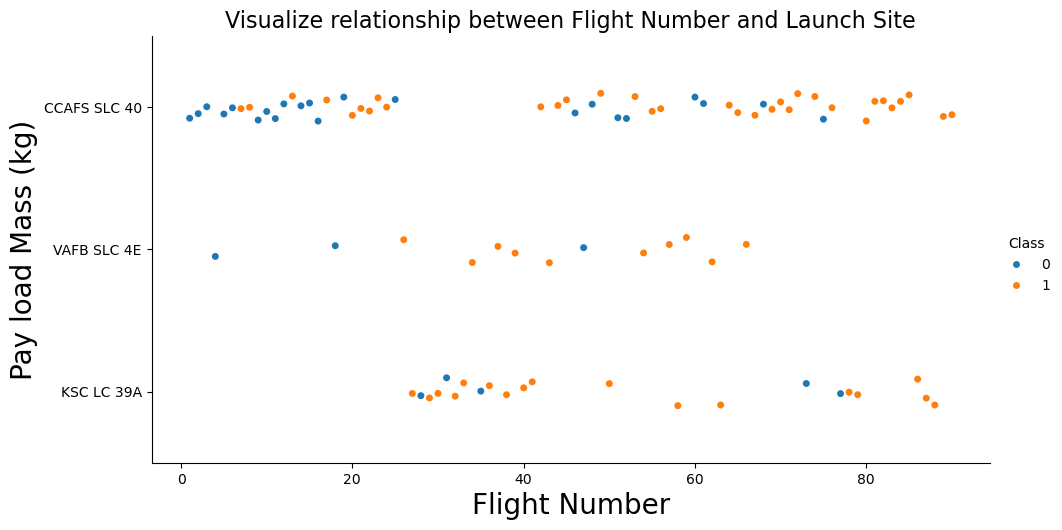

In [17]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.title("Visualize relationship between Flight Number and Launch Site", fontsize = 16)
plt.show()

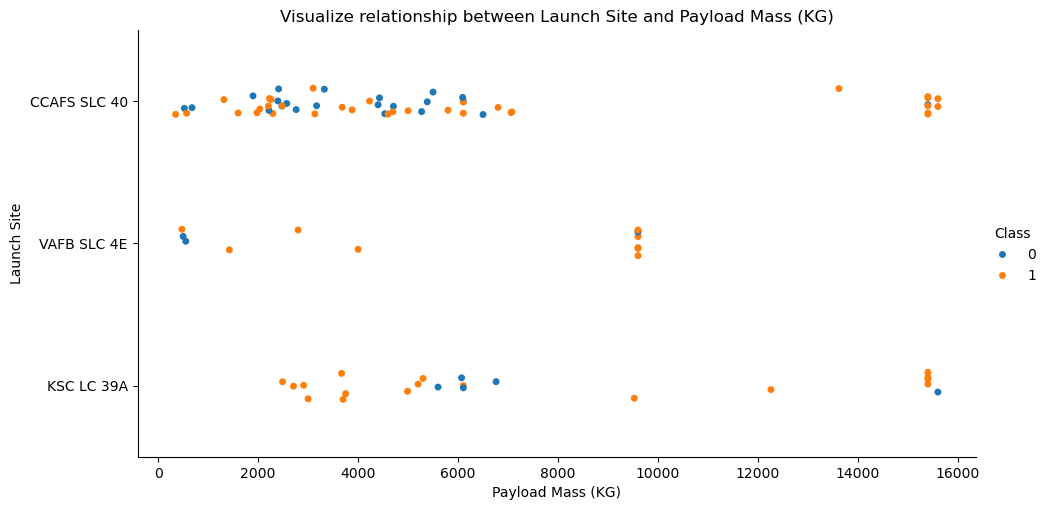

In [21]:
sns.catplot(x = "PayloadMass", y = "LaunchSite", hue = "Class", data = df, aspect = 2)
plt.xlabel("Payload Mass (KG)")
plt.ylabel("Launch Site")
plt.title("Visualize relationship between Launch Site and Payload Mass (KG)")
plt.show()

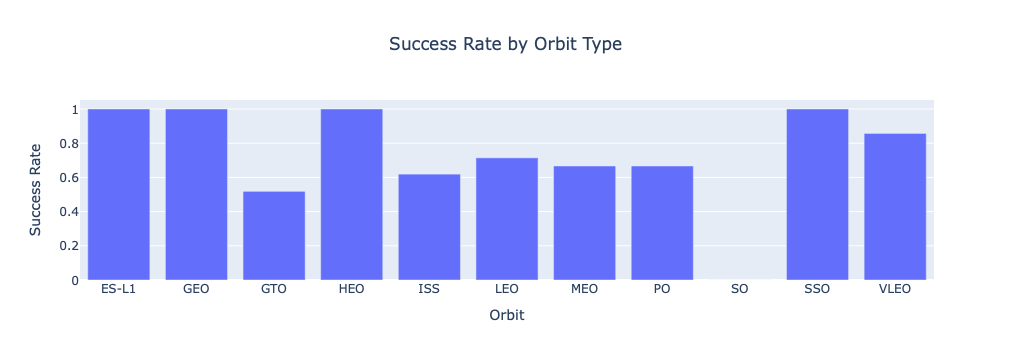

In [29]:
import plotly.express as px
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

fig = px.bar(orbit_success_rate,
             x = 'Orbit',
             y = 'Class',
             title = "Success Rate by Orbit Type",
             labels = {'Class': 'Success Rate'}
            )
fig.update_layout(title_x = 0.5)
fig.show()

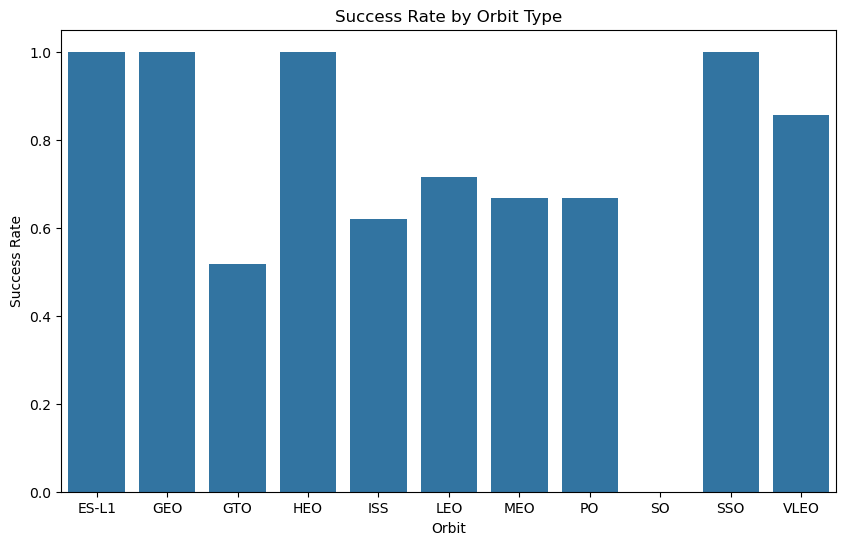

In [31]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "Orbit",
            y = "Class",
            data = orbit_success_rate
           )
plt.title("Success Rate by Orbit Type")
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.show()

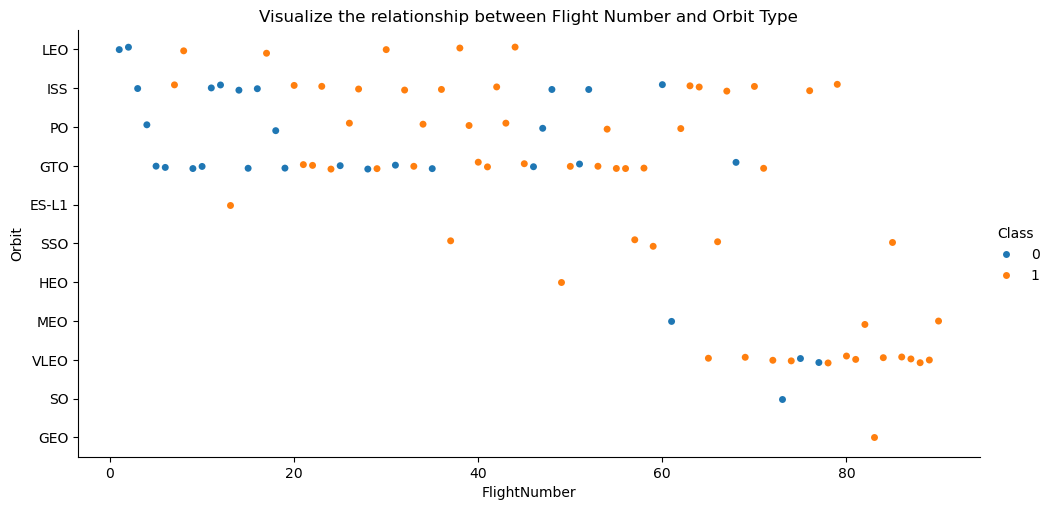

In [37]:
sns.catplot(x = "FlightNumber",
            y = "Orbit",
            hue = "Class",
            data = df,
            aspect = 2
           )
plt.title("Visualize the relationship between Flight Number and Orbit Type")
plt.show()

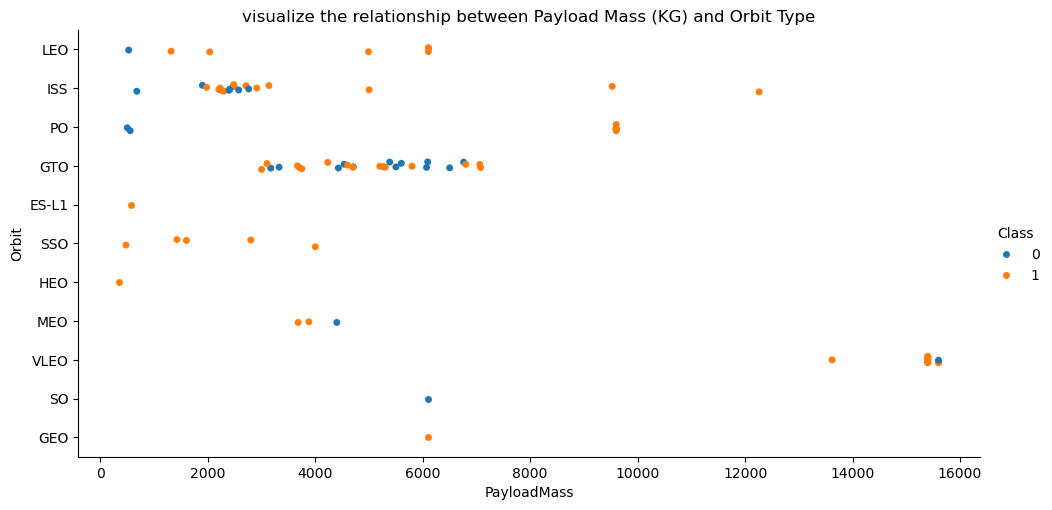

In [41]:
sns.catplot(x = "PayloadMass",
            y = "Orbit",
            hue = "Class",
            data = df,
            aspect = 2
           )
plt.title("visualize the relationship between Payload Mass (KG) and Orbit Type")
plt.show()

In [43]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


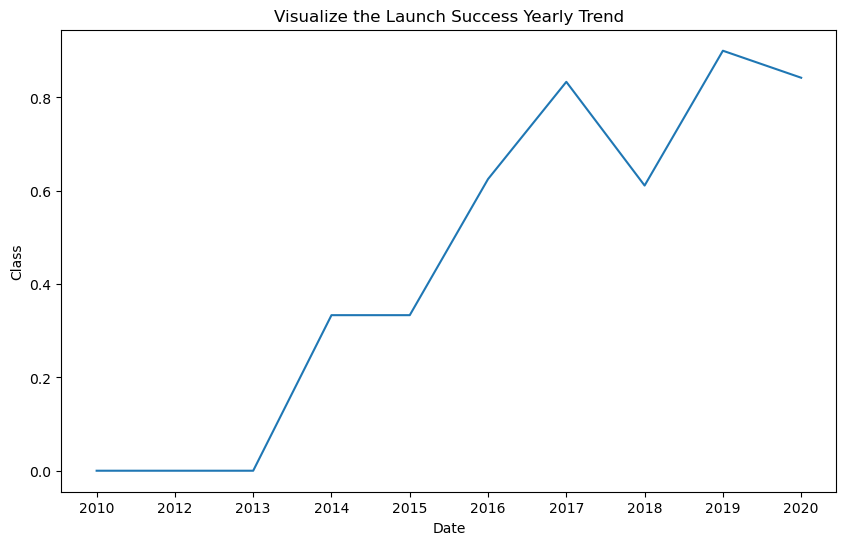

In [45]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
yearly_success_rate = df.groupby('Date')['Class'].mean().reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(x = "Date",
             y = "Class",
             data = yearly_success_rate
        )
plt.title("Visualize the Launch Success Yearly Trend")
plt.show()

## Features Engineering

In [48]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [50]:
# Create Dummy variables to categorical columns
features_one_hot = pd.get_dummies(features, columns = ["Orbit", "LaunchSite", "LandingPad", "Serial"])
print(features_one_hot)

    FlightNumber   PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0              1   6104.959412        1     False   False  False    1.0   
1              2    525.000000        1     False   False  False    1.0   
2              3    677.000000        1     False   False  False    1.0   
3              4    500.000000        1     False   False  False    1.0   
4              5   3170.000000        1     False   False  False    1.0   
..           ...           ...      ...       ...     ...    ...    ...   
85            86  15400.000000        2      True    True   True    5.0   
86            87  15400.000000        3      True    True   True    5.0   
87            88  15400.000000        6      True    True   True    5.0   
88            89  15400.000000        3      True    True   True    5.0   
89            90   3681.000000        1      True   False   True    5.0   

    ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0             0        

In [52]:
# Cast all numeric columns to "float64"
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
features_one_hot.to_csv("dataset_part_3.csv", index = False)

In [56]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         